In [101]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [102]:
# helper
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [104]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

data = pd.read_csv(URL1)

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [105]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

X = pd.read_csv(URL2)

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [106]:
# Creating a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).
Y = data["Class"].to_numpy()

In [107]:
# Standardizing the data in X then reassigning it to the variable X using the transform 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [108]:
# Using the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Y_test.shape

(18,)

In [109]:
# Creating a logistic regression object then creating a GridSearchCV object logreg_cv with cv = 10. Fitting the object to find the best parameters from the dictionary parameters.
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}  # l1 lasso l2 ridge
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['lbfgs']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [110]:
# Outputting the GridSearchCV object for logistic regression. Displaying the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Test accuracy: 0.8333  (83.33%)


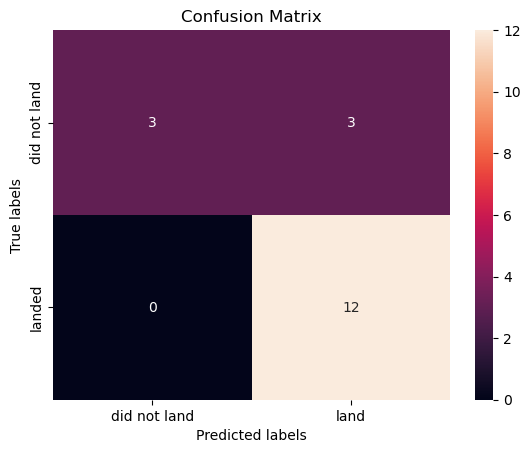

In [111]:
# Calculating the accuracy on the test data using the method score:
test_acc = logreg_cv.score(X_test, Y_test)
print(f"Test accuracy: {test_acc:.4f}  ({test_acc*100:.2f}%)")

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [112]:
# Creating a support vector machine object then creating a GridSearchCV object svm_cv with cv = 10. Fitting the object to find the best parameters from the dictionary parameters.
parameters = {'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring="accuracy", n_jobs=-1, refit=True)
svm_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [113]:
# Calculating the accuracy on the test data using the method score:
test_acc = svm_cv.score(X_test, Y_test)
print(f"Test accuracy: {test_acc:.4f}  ({test_acc*100:.2f}%)")

Test accuracy: 0.8333  (83.33%)


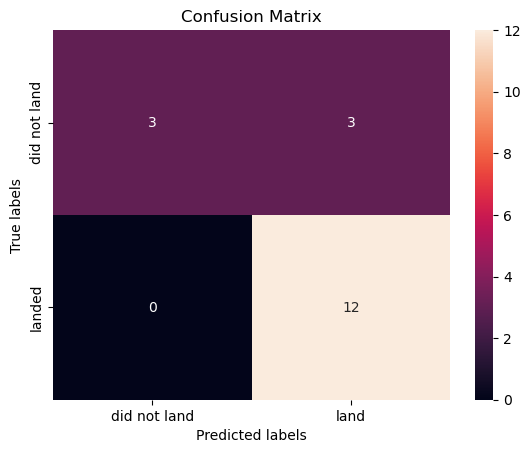

In [114]:
# Plotting the confusion matrix
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [123]:
# Creating a decision tree classifier object then creating a GridSearchCV object tree_cv with cv = 10. Fitting the object to find the best parameters from the dictionary parameters.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': [None, 'sqrt', 'log2'],   # ✅ removed 'auto'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

tree = DecisionTreeClassifier(random_state=2)

tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
    scoring="accuracy",
    n_jobs=-1,
    refit=True,
    error_score='raise'  # optional: makes it crash instead of warning if something is invalid
)

tree_cv.fit(X_train, Y_train)

print("best params:", tree_cv.best_params_)
print("best cv accuracy:", tree_cv.best_score_)

best params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
best cv accuracy: 0.8767857142857143


In [124]:
# Calculating the accuracy of tree_cv on the test data using the method score:
test_acc = tree_cv.score(X_test, Y_test)
print(f"Test accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

Test accuracy: 0.8333 (83.33%)


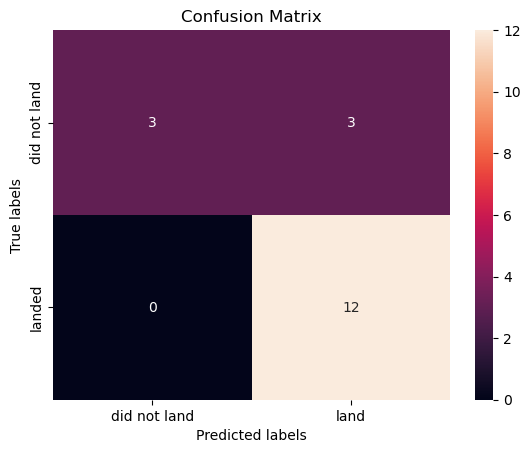

In [125]:
# Plotting the confusion matrix
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [126]:
# Creating a k nearest neighbors object then creating a GridSearchCV object knn_cv with cv = 10. Fitting the object to find the best parameters from the dictionary parameters.
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, scoring="accuracy", n_jobs=-1, refit=True)
knn_cv.fit(X_train, Y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'n_neighbors': [1, 2, ...], 'p': [1, 2]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,10


In [127]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [128]:
# Calculating the accuracy of knn_cv on the test data using the method score:
test_acc = knn_cv.score(X_test, Y_test)
print(f"Test accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

Test accuracy: 0.8333 (83.33%)


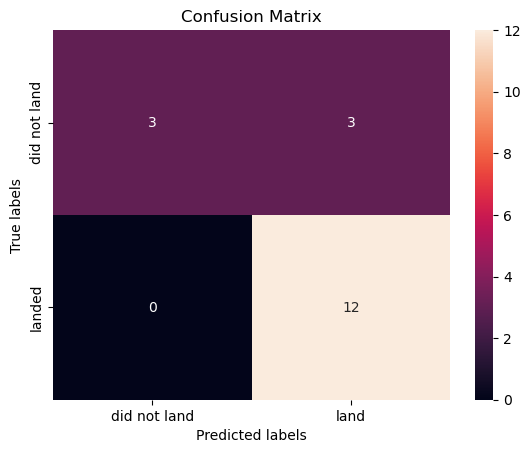

In [129]:
# Plotting the confusion matrix
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

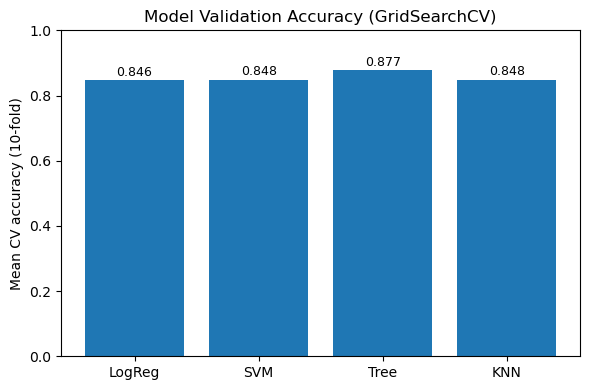

In [130]:
# Finding the method performs best:
names = ['LogReg', 'SVM', 'Tree', 'KNN']

cv_scores = [
    logreg_cv.best_score_,
    svm_cv.best_score_,
    tree_cv.best_score_,
    knn_cv.best_score_
]

plt.figure(figsize=(6, 4))
x = np.arange(len(names))
plt.bar(x, cv_scores)
plt.xticks(x, names)
plt.ylim(0, 1)
plt.ylabel('Mean CV accuracy (10-fold)')
plt.title('Model Validation Accuracy (GridSearchCV)')
for i, v in enumerate(cv_scores):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()